<div class="alert alert-block alert-info">
<b>

# Python for Data Science Bootcamp
## Lecture 20
    
## Textbook reference: Introduction to Probability
## Chapter 1

Here are the topics for this lecture:

* Simulation of Discrete Probabilities

Let's get started...
</b> 
</div>

### The focus of this section is to study chance experiements with a finite number of possible outcomes.

Key points:

### 1) A **random variable** is an expression whose value is the outcome of a particular experiment.  
 
For example, let X be the random variable which represents the roll of one die. We shall assign probabilities to the possible outcomes of this experiment. We do this by assigning to each outcome ωj a nonnegative number m(ωj) in such a way that

        **m(ω1) + m(ω2) + · · · + m(ω6) = 1**  

The function m(ωj) is called the **distribution function of the random variable X** and the sum of these distribution functions adds up to one (i.e. sum of probabilities of all possible outcomes of an experiement equals to one.

### 2) **Frequency interpretation of probability** says that the fraction of times that an event will occur if we repeate the experiment many times will approximate its true probability.

### 3) We can use python to simulate random variables and estimate probabilities of certain outcomes experimentally

### Random number generators are the computer equivalent of rolling a die, or flipping a coin.

Depending upon the particular software package, the computer can be asked to:

1) Create integers within a set of consecutive integers


2) Create real numbers between 0 and 1

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd
import numpy as np
import scipy.misc

##  Dice Rolling 

We consider a dice game that played an important role in the historical development of probability.

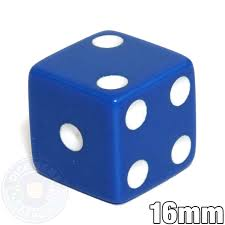

# Function Information
## numpy.random.randint 

numpy.random.randint(low, high=None, size=None, dtype='l')

Return random integers from low (inclusive) to high (exclusive).

Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).
    
Parameters:	

low : int

Lowest (signed) integer to be drawn from the distribution (unless high=None, in which case this parameter is one above the highest such integer).
    
high : int, optional

If provided, **one above the largest** (signed) integer to be drawn from the distribution (see above for behavior if high=None).

size : int or tuple of ints, optional

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.
   
dtype : dtype, optional

Desired dtype of the result. All dtypes are determined by their name, i.e., ‘int64’, ‘int’, etc, so byteorder is not available and a specific precision may have different C types depending on the platform. The default value is ‘np.int’.

Returns:	

out : int or ndarray of ints

size-shaped array of random integers from the appropriate distribution, or a single such random int if size not provided.

### Example 1.3: What is the probability of a given side (outcome) of dice after trying 10,000 times? Let's use "randint" function

In [84]:
data=np.random.randint(1,7,10000) # 10000 random integers between 1 and 6
data[0:10]

array([4, 2, 4, 6, 4, 3, 3, 2, 2, 5])

In [85]:
df=pd.DataFrame(data,columns=['outcome']) # Put data into df and label column "outcome"
df.head()

,outcome
0,4
1,2
2,4
3,6
4,4


In [86]:
# Use value_counts() method to determine counts for each outcome
df['outcome'].value_counts()

3    1699
2    1681
6    1669
4    1664
5    1654
1    1633
Name: outcome, dtype: int64

In [87]:
# By dividing counts of each outcome by total number of tries, we get probability of it
print("Number of tries is:", df.shape[0])
df['outcome'].value_counts()/df.shape[0] # Divide by # of rows

Number of tries is: 10000


3    0.1699
2    0.1681
6    0.1669
4    0.1664
5    0.1654
1    0.1633
Name: outcome, dtype: float64

In [88]:
realprob = 1/6
print("If unbiased dice, true probability of outcome (a side) is:",realprob)

If unbiased dice, true probability of outcome (a side) is: 0.16666666666666666


### We observe that true probability is very close to what we estimated using 10000 tries.

In [89]:
# What if we only try 5 times?
data1 = np.random.randint(1,7,5) # 5 random integers between 1 and 6
df1 = pd.DataFrame(data1,columns=["Outcome"])
df1["Outcome"].value_counts()/df1.shape[0]

6    0.4
5    0.2
3    0.2
1    0.2
Name: Outcome, dtype: float64

### Not even close....  Bottom line, the more tries the closer we get to true probability.

In [90]:
df.head(10) # First 10 samples in our data frame above

,outcome
0,4
1,2
2,4
3,6
4,4
5,3
6,3
7,2
8,2
9,5


# Function Information
## numpy.random.rand

numpy.random.rand(d0, d1, ..., dn)

Random values in a given shape.

Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1]
  
Parameters:	

d0, d1, ..., dn : int, optional

The dimensions of the returned array, should all be positive. If no argument is given a single Python float is returned.

Returns:	

out : ndarray, shape (d0, d1, ..., dn)
Random values.

### **Example 1.3:** What about the probability that a given outcome (side of a dice) occurs if we try 100,000 times? 

### Let's try using another Python/numpy function called "rand" 

In [91]:
# Create 100000 random numbers between 0 and 1
data=np.random.rand(100000)
data[0:10]

array([0.99016002, 0.57681823, 0.8303594 , 0.6430608 , 0.21379208,
       0.78184378, 0.82718923, 0.94233346, 0.95033534, 0.17688271])

In [92]:
# Let us multiply by 6 and add 1, so we now have real numbers between 1 and 7 (not including)
# Basically, this will covert the numbers from 0 to 1 into values from 1 to 7
ndata=(data*6)+1
ndata

array([6.94096014, 4.4609094 , 5.98215639, ..., 3.2096614 , 3.59955363,
       3.92273475])

In [93]:
# Create a dataframe comprised of 1 column named "outcome" and 100000 rows 
df=pd.DataFrame(ndata,columns=['outcome'])
df.head()

,outcome
0,6.940960
1,4.460909
2,5.982156
3,4.858365
4,2.282752


In [94]:
# Convert each value to integer using "astype" method
df['outcome'].astype(int)

0        6
1        4
2        5
3        4
4        2
        ..
99995    5
99996    5
99997    3
99998    3
99999    3
Name: outcome, Length: 100000, dtype: int64

In [95]:
# Now, let's use "value counts" method to determine counts for each outcome
df['outcome'].astype(int).value_counts()

1    16771
2    16681
4    16680
3    16659
6    16629
5    16580
Name: outcome, dtype: int64

In [96]:
# For each occurance, divide by total number of tries to get probabilities  
df['outcome'].astype(int).value_counts()/df.shape[0]

1    0.16771
2    0.16681
4    0.16680
3    0.16659
6    0.16629
5    0.16580
Name: outcome, dtype: float64

### Again, we see that estimated outcome probabilities are really close to true probability

In [97]:
data=np.random.rand(100000)
val=(data*6)+1
val # Look at random real numbers before converting to integers

array([1.98667604, 3.67085572, 2.70742448, ..., 3.20461914, 5.66905947,
       4.51941164])

## Coin flip - probability of heads or tails

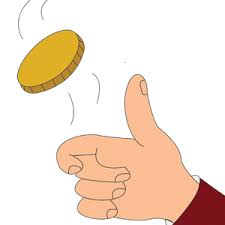

**Example:** Let's calculate the probability of heads or tails after 10,000 tries

### Let's create a random variable using randint method

In [98]:
# Create 10000 random integer numbers between 0 and 1 (0 or 1)
data=np.random.randint(0,2,10000)
data[0:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [99]:
# Create a dataframe containing those values with column label "outcome"
df=pd.DataFrame(data,columns=['outcome'])
# Count the number of occurances of each side using "value_count" method 
df['outcome'].value_counts()

0    5060
1    4940
Name: outcome, dtype: int64

In [100]:
# Then divide by total number of tries to get probability
df['outcome'].value_counts()/df.shape[0]

0    0.506
1    0.494
Name: outcome, dtype: float64

In [101]:
print("True probability of an outcome for unbiased coin is:", 1/2)

True probability of an outcome for unbiased coin is: 0.5


### Bottom line, we got really close to true probability

### Ok, let's make things a little more complicated...

### Example: DeMere 1 simulation.... Calculate probability that in four consecutive rolls of the dice at least one 6 will turn up

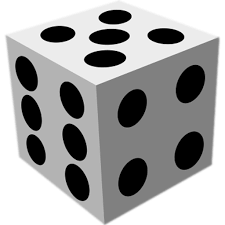

In [102]:
# Let define a variable for number of samples
N=1000000

### Let us build our random variable first using randint

Again, we will create outcomes array with values between 1 and 7 (not including).  But then, we reshape this array into four rows (i.e. four consecutive rolls) and N/4 columns.  So, each column is an experiment!

In [103]:
temp=np.random.randint(1,7,N).reshape(4,int(N/4))
temp[:,:5]

array([[1, 4, 4, 5, 2],
       [5, 3, 6, 3, 6],
       [2, 6, 6, 6, 5],
       [2, 3, 2, 3, 2]])

In [104]:
# Now could have also done as follows...
rows=4
columns=int(N/4)
temp1=np.random.randint(1,7,[rows,columns])
temp1

array([[2, 2, 4, ..., 6, 6, 6],
       [6, 3, 4, ..., 2, 5, 4],
       [1, 1, 4, ..., 5, 2, 5],
       [1, 5, 6, ..., 4, 3, 4]])

In [105]:
# Now, let's find out how many sixes I got in each experiment
# To do that, I create a boolean mask that searches for value six
mask=(temp==6)
mask

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [106]:
# Now, let's determine if I got any sixes in a given experiment
# I do this by using np.sum across rows (i.e. in each column) and checking if greater than 0
# Basically creating another mask
sixyes=np.sum(mask,axis=0)>0
sixyes

array([False,  True,  True, ..., False, False, False])

In [107]:
# Now, let's determine the average probability that a six would occur
# I do this by calculating how often a six showed up in our experiments
# simply calculate mean of "sixyes" mask
np.mean(sixyes)

0.518864

### Theoretical (exact) probability calculation

    1) Pns = Probability a six will not happen is 5/6 for each roll
    2) Pns4 = Multiply Pns four times (once for every roll)
    3) To get probability of at least one six take 1 - Pns4

In [108]:
1-(5/6*5/6*5/6*5/6)

0.5177469135802468

### Again, our estimation of probability got really close to true value

### Estimating Error of Prediction: Accurate results by simulation require a large number of experiments

**Rule of thumb:**. At least 95% of the time, the error does not exceed the reciprocal of the square root of the number of trials.  So if I tried 100 times, the error is likely to be less than 10%

In [109]:
(1/np.sqrt(100))*100

10.0

In [110]:
# If I try 1000 times, the error is likely to be less than 3.16%
N=1000
(1/np.sqrt(N))*100

3.162277660168379

## Example DeMere2: 

What is the probability that a pair of sixes will occur after 2 rolls of the dice?

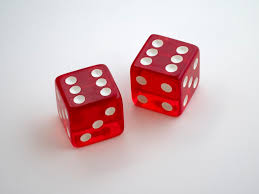

Let's define a couple of variables:

    1) n_rolls (number of rolls in one experiement)
    2) n_trials (number of experiments)

In [133]:
n_rolls=2
n_trials=100000

### I will create two random variables one for each dice.  Each column is an experiement and each row is a consecutive roll.  Finally, rather than reshaping, I would specify number of rolls and columns directly into randint function as demonstrated before

In [134]:
# Each experiment (trial) is a column
# Each row is a different roll
# Let's generate n_rolls x n_trials values 
# in Numpy array of random integers between 1 and 6
# with a shape of n_rolls rows and n_trials columns
# Create two different sets of values, one for each dice

# Dice #1
temp1=np.random.randint(1,7,[n_rolls,n_trials]) 
# Dice #2
temp2=np.random.randint(1,7,[n_rolls,n_trials])
print("first dice\n",temp1[:,:5])
print("second dice\n",temp2[:,:5])

first dice
 [[6 2 5 6 6]
 [4 2 4 4 5]]
second dice
 [[1 3 4 1 2]
 [2 6 3 3 3]]


In [135]:
# Now, using same logic as before, I answer the following question.....
# How often do I got at least one six in one dice AND at least a six in the other?
estimate=np.mean(np.sum((temp1==6)&(temp2==6),axis=0)>0)
print("The estimated probability is {} percent".format(estimate*100))

The estimated probability is 5.612 percent


## Let's break it down...

In [114]:
temp1==6 # Did I get a six in dice #1?

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

In [115]:
# How many sixes in a given experiment? (axis=0)
np.sum(temp1==6, axis=0) 

array([0, 0, 0, ..., 0, 0, 1])

In [116]:
# Did I get at least one six in an experiment or column? (axis=0)
(np.sum(temp1==6, axis=0)>0) 

array([False, False, False, ..., False, False,  True])

In [117]:
# How many times did I get at least one six in an experiment of dice 1? (axis=0)
np.sum(np.sum(temp1==6, axis=0)>0) 

30600

In [118]:
# How many times did I get two sixes (in same dice) in an experiment? (axis=0)
np.sum(np.sum(temp1==6, axis=0)==2) 

2763

In [119]:
# How many times did I get two sixes (on same dice) in an experiment? (axis=0)
np.mean(np.sum(temp1==6, axis=0)==2) 

0.02763

In [120]:
# How frequently did I see at least one six in dice #1?
np.mean(np.sum((temp1==6),axis=0)>0) 

0.306

In [121]:
# How frequently did I see at least one six in dice #2?
np.mean(np.sum((temp2==6),axis=0)>0) 

0.30523

In [136]:
# Now six in both dies in same experiment?
np.mean(np.sum((temp1==6)&(temp2==6),axis=0)>0)

0.05612

## Done with breakdown.  Is it clear???

In [137]:
# Theoretical probability
# For each roll there are a total of 36 possible outcomes
# The probability of NOT getting a pair of sixes is 35/36 on a given roll
# Probability of NOT getting a pair of sixes in two cosecutive rolls is (35/36)*(35/36)
# Probability of getting a pair of sixes in two rolls is 1 minus prob of not getting them
1 - (35/36)**2

0.05478395061728403

In [138]:
# Based on our error calculation before, the error in our estimate is less than 0.3%:
print("The error is less than {} percent".format((1/np.sqrt(n_trials))*100))

The error is less than 0.3162277660168379 percent


## What are the chances of getting a six at least once if I roll 24 times?

In [139]:
n_rolls=24
n_trials=10000000
temp1=np.random.randint(1,7,[n_rolls,n_trials])
temp1
np.mean(np.sum(temp1==6, axis=0)>0)*100

98.74016

In [126]:
# Theoretical probability
(1 - (5/6)**24)*100

98.74208847875246

In [127]:
print("The error is less than {} percent".format((1/np.sqrt(n_trials))*100))

The error is less than 0.03162277660168379 percent


**Example 1.5 (Horse Races)** Four horses (Acorn, Balky, Chestnut, and Dolby)
with different winning records. It is estimated that Acorn wins 30 percent of the time, Balky 40 percent of the time, Chestnut 20 percent of the time, and Dolby 10 percent of the time.

Let's calculate outcome of N races

Acorn won 29.75
Balky won 40.163
Chestnut won 19.938
Dolby won 10.149


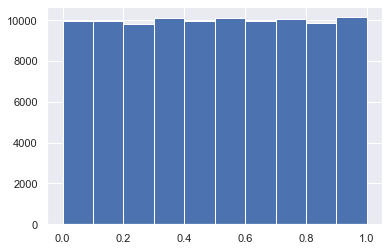

In [140]:
N=100000 # Number of races
data=np.random.rand(N) # Create numpy array with N random values (between 0 and 1)
plt.hist(data)
# Let's say each value represents a race, if value is less than 0.3 we say Acorn won
print('Acorn won',100*np.sum(data<0.3)/N)
# If value less than 0.7 AND more than 0.3, Balky won race
print('Balky won',100*np.sum((data<0.7)&(data>=0.3))/N)
# If value less than .9 AND more than .7, Chesnut won
print('Chestnut won',100*np.sum((data<0.9)&(data>=0.7))/N)
# If value is greater than .9 Dolby won
print('Dolby won',100*np.sum(data>0.9)/N)

### You could have used multinomial function...

### numpy.random.multinomial

numpy.random.multinomial(n, pvals, size=None)

    Draw samples from a multinomial distribution.

    The multinomial distribution is a multivariate generalisation of the binomial distribution. Take an experiment with one of p possible outcomes. An example of such an experiment is throwing a dice, where the outcome can be 1 through 6. Each sample drawn from the distribution represents n such experiments. Its values, X_i = [X_0, X_1, ..., X_p], represent the number of times the outcome was i.
    Parameters:	

    n : int

        Number of experiments.

    pvals : sequence of floats, length p

        Probabilities of each of the p different outcomes. These should sum to 1 (however, the last element is always assumed to account for the remaining probability, as long as sum(pvals[:-1]) <= 1).

    size : int or tuple of ints, optional

        Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

    Returns:	

    out : ndarray

        The drawn samples, of shape size, if that was provided. If not, the shape is (N,).

        In other words, each entry out[i,j,...,:] is an N-dimensional value drawn from the distribution.


In [141]:
N=100000
data=np.random.multinomial(N,[0.3,0.4,0.2,0.1])
data
# Generates four sets of outcomes each for corresponding probability

array([29864, 40208, 19921, 10007])

Acorn won 0.29864
Balky won 0.40208
Chestnut won 0.19921
Dolby won 0.10007


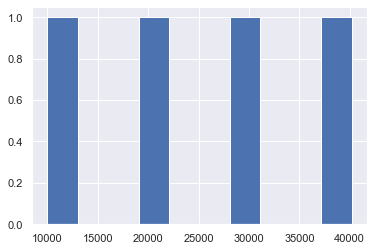

In [142]:
plt.hist(data)
print('Acorn won',data[0]/N)
print('Balky won',data[1]/N)
print('Chestnut won',data[2]/N)
print('Dolby won',data[3]/N)

In [131]:
# If you want to see full set of options within numpy random function
dir(np.random)

['BitGenerator',
 'Generator',
 'MT19937',
 'PCG64',
 'Philox',
 'RandomState',
 'SFC64',
 'SeedSequence',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bit_generator',
 '_bounded_integers',
 '_common',
 '_generator',
 '_mt19937',
 '_pcg64',
 '_philox',
 '_pickle',
 '_sfc64',
 'absolute_import',
 'beta',
 'binomial',
 'bytes',
 'chisquare',
 'choice',
 'default_rng',
 'dirichlet',
 'division',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'print_function',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',

## In closing, .....

### a discret probability distribution is one where the outcomes are either finite or countable infinite and we can use Python/numpy functions like rand.randint and rand.rand to simulate discrete probability distributios and estimate the probability of a certain outcomes